In [1]:
import json
with open('schulen.json') as f:
    schulen = json.load(f)

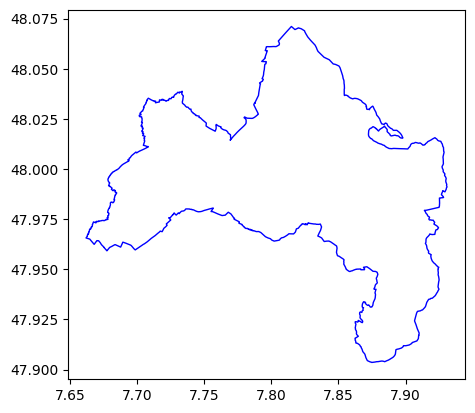

In [3]:
# Read landuse
# ============
from pyrosm import OSM
import pyrosm
from pyrosm import get_data

lk_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf")
#fp = get_data("freiburg_regbez",directory='pbf/')
# Initialize the OSM parser object
#osm = OSM(fp)
#bh_bound=lk_osm.get_boundaries(name='Landkreis Breisgau-Hochschwarzwald')
bh_bound=lk_osm.get_boundaries(name='Freiburg im Breisgau')
#tags = {'boundary': 'administrative'}   
lk_bh=bh_bound
lk_bh_poly=bh_bound.geometry[0]
lk_bh.plot(facecolor="none", edgecolor="blue")
lk_osm=""


In [4]:
import pyrosm
# Ebene Gemeinde
gem_in_bh_gdf_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=lk_bh_poly)
gem_in_bh_gdf_of=gem_in_bh_gdf_osm.get_boundaries()
#Filter notwendig, da einige Grenzen außerhalb enthalten waren
in_bh=gem_in_bh_gdf_of.within(lk_bh_poly)

In [11]:
gem_in_bh_gdf=gem_in_bh_gdf_of[ in_bh &  (gem_in_bh_gdf_of['admin_level']=='6') ]  


<Axes: >

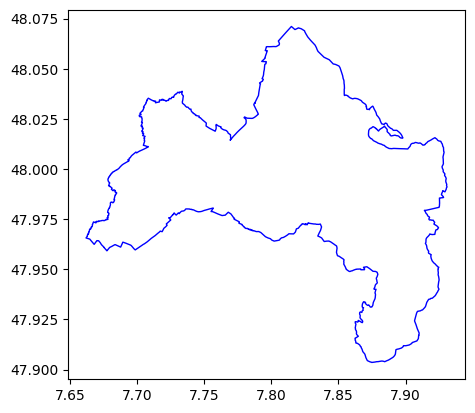

In [12]:
gem_in_bh_gdf.plot(facecolor="none",edgecolor="blue")
#lk_bh.plot()

In [13]:
gem_in_bh_gdf
len(gem_in_bh_gdf)

1

In [15]:
## Findet alle Teilorte
#in_bh=gem_bh_gdf.within(eki_poly)
ort_in_bh_gdf=gem_in_bh_gdf_of[ in_bh & (gem_in_bh_gdf_of['boundary']=='administrative') &  ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  
len(ort_in_bh_gdf)
ort_in_bh_gdf

,name,website,admin_level,boundary,postal_code,border_type,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
21,Vauban,None,10,administrative,None,None,None,24103662,1620155134,21,0,"POLYGON ((7.81641 47.97712, 7.81843 47.97736, ...","{""name:de"":""Vauban"",""name:gsw"":""Fauban"",""type""...",relation
58,Sankt Georgen,None,10,administrative,None,None,None,3945812186,1620155134,22,0,"POLYGON ((7.75512 47.97880, 7.75678 47.98053, ...","{""name:de"":""Sankt Georgen"",""name:en"":""Saint Ge...",relation
61,Haslach,None,10,administrative,None,None,None,3953597115,1620155134,16,0,"POLYGON ((7.79922 47.99349, 7.79858 47.99264, ...","{""name:de"":""Haslach"",""name:gsw"":""Hasle"",""type""...",relation
62,Günterstal,None,9,administrative,None,None,None,3955543477,1703947461,18,0,"POLYGON ((7.83743 47.97116, 7.83786 47.97110, ...","{""type"":""boundary""}",relation
65,Kappel,None,9,administrative,None,None,None,3963334617,1694196070,12,0,"POLYGON ((7.88224 47.94796, 7.88184 47.94875, ...","{""type"":""boundary"",""wikidata"":""Q1728696"",""wiki...",relation
66,Littenweiler,None,10,administrative,None,None,None,3965283253,1693336539,10,0,"POLYGON ((7.87350 47.97237, 7.87641 47.97076, ...","{""type"":""boundary"",""wikidata"":""Q1865542"",""wiki...",relation
67,Waldsee,None,10,administrative,None,None,None,3967231913,1583276155,17,0,"POLYGON ((7.87101 47.98573, 7.87200 47.98420, ...","{""type"":""boundary"",""wikidata"":""Q2541892"",""wiki...",relation
68,Wiehre,None,10,administrative,None,None,None,3969180574,1693336539,35,0,"POLYGON ((7.82365 47.97832, 7.82389 47.97817, ...","{""name:de"":""Wiehre"",""name:gsw"":""Wihri"",""type"":...",relation
71,Waltershofen,None,9,administrative,None,None,None,3992601977,1514841620,9,0,"POLYGON ((7.70672 48.03322, 7.70674 48.03324, ...","{""type"":""boundary"",""wikidata"":""Q2547034"",""wiki...",relation
74,Hochdorf,None,9,administrative,None,None,None,4000419867,1488136508,8,0,"POLYGON ((7.78997 48.03605, 7.79043 48.03664, ...","{""type"":""boundary"",""wikidata"":""Q885057"",""wikip...",relation


In [ ]:
#import datetime
#import osmnx as ox
#gem_walk_net_nodes, gem_walk_net_edges = gem_osm.get_network(network_type="walking",nodes=True)


#tags_lu={'landuse':['residential','farmyard','industrial','commercial']}
#gem_gdf_lu=gem_osm.get_landuse(custom_filter=tags_lu)
#gem_gdf_lu.plot(column='landuse', legend=True, figsize=(10,6))

#tags = {'addr:housenumber': True}

#gem_gdf_hn=gem_osm.get_data_by_custom_criteria(custom_filter=tags)

#gem_gdf_hn.plot()

#gem_walk_net_nodes, gem_walk_net_edges = gem_osm.get_network(network_type="walking",nodes=True)
#gem_walk_net = osm.to_graph(gem_walk_net_nodes, gem_walk_net_edges, graph_type="networkx")
#meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
#for _, _, _, data in gem_walk_net.edges(data=True, keys=True):
#    data["time"] = data["length"] / meters_per_minute

#G = osm.to_graph(gem_walk_net_nodes, gem_walk_net_edges, graph_type="networkx")
#ox.plot_graph(gem_walk_net)
#poi=ox.distance.nearest_nodes(gem_walk_net, cur["lng"],cur["lat"])
#row_gem['geometry'].within(lk_bh_poly)
#dir(row_gem['geometry'])
geo=row_gem['geometry']
geo.area

In [16]:
######
#
#  Dies ist die Hauptprozedur. 
#  Hier wird über alle Orte iteriert und dabei jeweils zuerst das osm für ein Bereich eingestellt und danach
#  die Wege, Gebäude und Schulen eingetragen und ausgewertet.
#
######
import pandas as pd
import numpy
from shapely.geometry import Point
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib
import osmnx as ox
import datetime

network_type = "walk"
trip_times = [5, 10, 15, 20, 25,30,40]  # in minutes
travel_speed = 3  # walking speed in km/hour
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)
cmap = matplotlib.cm.turbo
norm = matplotlib.colors.BoundaryNorm(trip_times, cmap.N)
place='sk_fr'

sc=[]
for cur in (schulen["schools"]):
    p=Point(cur["lng"],cur["lat"])
    sc=sc+[[p,cur["name"]]]

alle_gem=pd.DataFrame()
for index_gem,row_gem in gem_in_bh_gdf.iterrows():
    gem_name=row_gem['name']
    print('Gem: {} - Fläche: {}'.format(gem_name,row_gem['geometry'].area))
    #if gem_name=='Bollschweil':
    #if row_gem['geometry'].area > 0.0002:
    if 1==1:
        print('Line 0036: {} - {}'.format(datetime.datetime.now(),gem_name))
        #gem_poly=row_gem['geometry'].values[0]
        # Initialisierung des Gebiets
        gem_poly=row_gem['geometry']
        #gem_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=gem_poly)
        gem_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=gem_poly)

        # Wegenetz
        # Zeit wird erst verwendet, wenn Aufruf gemacht wird. Davor ist Initialierung
        gem_walk_net_nodes, gem_walk_net_edges = gem_osm.get_network(network_type="walking",nodes=True)
        print('Line 0048: {} - {}'.format(datetime.datetime.now(),gem_name))
        # to_graph evtl. anderes Paket
        gem_walk_net = gem_osm.to_graph(gem_walk_net_nodes, gem_walk_net_edges, graph_type="networkx")
        meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
        for _, _, _, data in gem_walk_net.edges(data=True, keys=True):
            data["time"] = data["length"] / meters_per_minute

        print('Line 0055: {} - {}'.format(datetime.datetime.now(),gem_name))
        
        # Landuse
        tags_lu={'landuse':['residential','farmyard','industrial','commercial']}
        gem_gdf_lu=gem_osm.get_landuse(custom_filter=tags_lu)

        #tags = {'building': True}  
        #gdf_gem_build=ox.features_from_polygon(gem_poly,tags)
        tags = {'addr:housenumber': True}
        
        gdf_gem_hn=gem_osm.get_data_by_custom_criteria(custom_filter=tags)
        
        gdf_gem_hn['triptime']=120
        

        in_gem=gem_poly
        ort_in_bh_gdf=gem_in_bh_gdf_of[ in_bh & (gem_in_bh_gdf_of['boundary']=='administrative') &  ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  
        
        # Ortsteile: 
        in_gem=gem_in_bh_gdf_of.within(gem_poly)
        ort_in_gem_gdf=gem_in_bh_gdf_of[ in_gem & (gem_in_bh_gdf_of['boundary']=='administrative') &  ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  

        # Aufbau Listen:     
        t=pd.DataFrame({'GemName':[gem_name]})
        x=ort_in_gem_gdf['name'].values
        if gem_name not in x:
            x=numpy.append(x,[[gem_name]])
        ort=pd.DataFrame({'OrtName': x})
        #ort=pd.DataFrame[{'Name':x[0]}]
        y=numpy.unique(gem_gdf_lu['landuse'].values)
        y=numpy.append(y,[['unbekannt']])
        #y.append('unbekannt')
        landuse_df=pd.DataFrame({'Landuse': y})
        tt=pd.DataFrame({'WegeDauer':[0]+trip_times+[120]})
        
        res=pd.merge(ort,landuse_df, how='cross')
        res2=pd.merge(t,res, how='cross')
        boxen=pd.merge(res2,tt, how='cross')
        boxen=boxen.set_index(['GemName','OrtName','Landuse','WegeDauer'])
        boxen['Anzahl']=0
            
        print('Line 0088: {} - {}'.format(datetime.datetime.now(),gem_name))
        
        node_colors = {}
        node_time = {}
        for cur in (schulen["schools"]):
            p=Point(cur["lng"],cur["lat"])
            if p.within(gem_poly): 
                poi=ox.distance.nearest_nodes(gem_walk_net, cur["lng"],cur["lat"])
                for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
                    subgraph = nx.ego_graph(gem_walk_net, poi, radius=trip_time, distance="time")
                    for node in subgraph.nodes():
                        col_old=0
                        if node in node_colors:
                            col_old=sum(node_colors[node])
                        if sum(color)>col_old:
                            node_colors[node] = color
                        col_time=10000000
                        if node in node_time:
                            col_time=node_time[node]
                        if trip_time<col_time:
                            node_time[node] = trip_time    
        print('Line 0118: {} - {}'.format(datetime.datetime.now(),gem_name))

        iter=0
        for idx_build, row_build in gdf_gem_hn.iterrows():
            poly_build=row_build['geometry']
            #poly_ort = gpd.GeoSeries(row_orte['geometry'])
            p_center=poly_build.centroid
            poi=ox.distance.nearest_nodes(gem_walk_net, p_center.x,p_center.y)
            WegeDauer=120
            if poi in node_time:
                WegeDauer=node_time[poi]
                gdf_gem_hn.loc[idx_build,['triptime']]=node_time[poi]
            #if poi in node_time:
            
            Landuse='unbekannt'
            for idx_landuse, row_landuse in gem_gdf_lu.iterrows():
                lu_type=row_landuse['landuse']
                poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                if poly_lu.contains(p_center).any():
                    Landuse=lu_type
                    break
            Ortsteil=gem_name
            for idx_ort, row_ort in ort_in_gem_gdf.iterrows():
                poly_ortt = gpd.GeoSeries(row_ort['geometry'])
                if poly_ortt.contains(p_center).any():
                    Ortsteil=row_ort['name']
                    break
            boxen.at[(gem_name,Ortsteil,Landuse,WegeDauer),'Anzahl']=boxen.at[(gem_name,Ortsteil,Landuse,WegeDauer),'Anzahl']+1
            if iter%100==0:
                print('Line 0147: {} - {} - {}'.format(datetime.datetime.now(),iter,gem_name))

            iter+=1

        print('Line 0151: {} - {}'.format(datetime.datetime.now(),gem_name))
    
        boxen.to_csv('erstellte_daten/'+gem_name+'.csv',index=True)
        if len(alle_gem)<5:
            alle_gem=boxen
        else:
            alle_gem=alle_gem+boxen
        alle_gem.to_csv('erstellte_daten/'+place+'.csv',index=True)

        br=1
        anz=1

        gp_b=gem_poly.bounds[2]-gem_poly.bounds[0]
        gp_l=gem_poly.bounds[3]-gem_poly.bounds[1]
        md=max(gp_b,gp_l)
        size=60/md


        print('Line 0151: {} - {}'.format(datetime.datetime.now(),gem_name))
     
        fig, axs = plt.subplots(anz,br,figsize=(int(gp_b*size), int(gp_l*size)))
        #fig, axs = plt.subplots(anz,br)
        axs.set_title(gem_name)
        gem_gdf_lu.plot(ax=axs,column='landuse', facecolor='none',legend=True)
        for idx_orte, row_orte in ort_in_gem_gdf.iterrows():
            poly_ort = gpd.GeoSeries(row_orte['geometry'])
            p_center=poly_ort.centroid
            if gem_poly.contains(p_center).any():
                poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
                axs.annotate(text=row_orte["name"], xy=(p_center[0].x,p_center[0].y), horizontalalignment='center')
        if len(ort_in_gem_gdf)==0:
            gem_poly_gpd = gpd.GeoSeries(gem_poly)
            gem_poly_gpd.plot(ax=axs,facecolor='none', edgecolor='blue') 
        gdf_gem_hn.plot(ax=axs,column='triptime',markersize =5, cmap=cmap,norm=norm)
        #nc = [node_colors[node] if node in node_colors else "none" for node in gdf_gem_walk.nodes()]
        #ns = [5 if node in node_colors else 0 for node in gdf_gem_walk.nodes()]
        #poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
        fig, ax = ox.plot_graph(
            gem_walk_net,
            ax=axs,
            #node_color=nc,
            #node_size=ns,
            node_alpha=0.8,
            edge_linewidth=0.2,
            edge_color="#999999",
            show=False, 
            close=False
        )
        for cur in sc:
            axs.scatter(cur[0].x,cur[0].y,color='red',s=80)    
            axs.annotate(text=cur[1], xy=(cur[0].x,cur[0].y), horizontalalignment='center')
            #axs[sw//br,sw%br].set_ylim(poly_gem.bounds["miny"][0],poly_gem.bounds["maxy"][0])
            #axs[sw//br,sw%br].set_xlim(poly_gem.bounds["minx"][0],poly_gem.bounds["maxx"][0])
        plt.savefig('images/'+gem_name+'.png')
        #plt.show()



Gem: Freiburg im Breisgau - Fläche: 0.01843730064047122
Line 0036: 2024-09-05 09:26:31.302114 - Freiburg im Breisgau
Line 0048: 2024-09-05 09:28:32.420792 - Freiburg im Breisgau
Line 0055: 2024-09-05 09:28:41.077972 - Freiburg im Breisgau
Line 0088: 2024-09-05 09:28:52.187868 - Freiburg im Breisgau
Line 0118: 2024-09-05 09:29:44.065925 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:29:44.679906 - 0 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:30:44.548246 - 100 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:31:42.640122 - 200 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:32:39.956133 - 300 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:33:41.428745 - 400 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:34:42.070544 - 500 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:35:44.953695 - 600 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:36:45.121550 - 700 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:37:46.813394 - 800 - Freiburg im Breisgau
Line 0147: 2024-09-05 09:38:49.512564 

KeyboardInterrupt: 

In [ ]:
len(ort_in_gem_gdf)

In [ ]:
#hn_colors_series = pd.DataFrame.from_dict(hn_colors,orient='index')
#hn_colors_series

colors = map(lambda x: hn_colors.get(x, (0.5,0.5,0.5,1)), gdf_gem_hn.index.get_level_values(1))

In [ ]:
#hn_colors
for cur in gdf_gem_hn.index:
    osmid =cur[1] 
    #print (cur[1])
    if osmid in hn_colors:
        print(hn_colors[osmid])